In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Mnist 데이터 불러오기

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [7]:
# 생성자 모델 만들기

autoencoder = Sequential()

# 인코딩 부분(차원을 축소하는 부분)
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape = (28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding = 'same'))
# 입력을 줄이기 위한 방법 : maxpooling 사용
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size = 3, strides = 2, padding = 'same', activation='relu'))

# 디코딩 부분 (차원을 늘리는 부분)
autoencoder.add(Conv2D(8, kernel_size=3, padding = 'same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding = 'same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation = 'relu'))
# padding 과정 없음 >> 크기 축소, kernel_size 3*3 >> 차원 축소
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding = 'same', activation='sigmoid'))

# 전체 구조 확인
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 8)          

In [8]:
# 컴파일 및 학습

autoencoder.compile(loss = 'binary_crossentropy', optimizer='adam')
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 128, validation_data = [x_test, x_test])
# 복원이 잘되는 지 확인하기위해 y값에 x_train을 넣어준다

# 학습된 결과 출력
random_test = np.random.randint(x_test.shape[0], size = 5)
# 테스트 할 이미지 랜덤하게 불러오기
ae_imgs = autoencoder.predict(x_test)
# 오토 인코더 모델에 넣어 예측하기


Epoch 1/50
469/469 [==============================] - 6s 5ms/step - loss: 0.1970 - val_loss: 0.1297
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1206 - val_loss: 0.1128
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1103 - val_loss: 0.1065
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1013 - val_loss: 0.0987
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0986 - val_loss: 0.0968
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0968 - val_loss: 0.0948
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0952 - val_loss: 0.0935
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0939 - val_loss: 0.0921
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0929 - val_loss: 0.0913

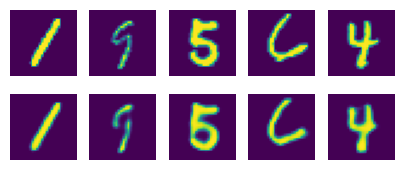

In [11]:
# 데이터 시각화

plt.figure(figsize = (7,2))

for i, image_idx in enumerate(random_test) :
    # 랜덤하게 추출한 이미지를 차례로 나열
    ax = plt.subplot(2, 7,i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    # 테스트 할 이미지를 먼저 그대로 보여줌
    ax.axis('off')
    ax = plt.subplot(2, 7,7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    # 오토인코딩 결과를 다음 열에 출력함
    ax.axis('off')

In [1]:
import tensorflow as tf
tf.__version__

'2.10.1'